##############################################
# 게임 매상 감소 원인 분석
############################################## 
### 1단계 : CSV 파일을 읽어들이기
### 2단계 :DAU 데이터에 Install 데이터를 결합시키기 
### 3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기   
### 4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서  넣기  
### 5단계 : 월차 집계를 위한 월 항목 컬럼 추가    
### 6단계 :추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)  
### 7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가
### 8단계 :로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
### 9단계 : 그래프로 데이터 시각화 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1단계 : CSV 파일을 읽어들이기
dau_df = pd.read_csv('./game_ws1_datas/dau.csv')
dpu_df = pd.read_csv('./game_ws1_datas/dpu.csv')
install_df = pd.read_csv('./game_ws1_datas/install.csv')

print("DAU 데이터\n", dau_df.head(2))
print(dau_df.info())
print()

print("DPU 데이터\n", dpu_df.head(2))
print(dpu_df.info())
print()

print("Install 데이터\n", install_df.head(2))
print(install_df.info())
print()

DAU 데이터
      log_date app_name  user_id
0  2013-06-01  game-01      116
1  2013-06-01  game-01    13491
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139112 entries, 0 to 139111
Data columns (total 3 columns):
log_date    139112 non-null object
app_name    139112 non-null object
user_id     139112 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.2+ MB
None

DPU 데이터
      log_date app_name  user_id  payment
0  2013-06-01  game-01      351    13330
1  2013-06-01  game-01    12796      810
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 4 columns):
log_date    884 non-null object
app_name    884 non-null object
user_id     884 non-null int64
payment     884 non-null int64
dtypes: int64(2), object(2)
memory usage: 27.8+ KB
None

Install 데이터
   install_date app_name  user_id
0   2013-04-15  game-01        1
1   2013-04-15  game-01        2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (tota

In [3]:
### 2단계 :DAU 데이터에 Install 데이터를 결합시키기 
dau_install_df = pd.merge(dau_df, install_df, on=['user_id','app_name'])
orderd_user = dau_install_df.sort_values('user_id')
orderd_user

,log_date,app_name,user_id,install_date
143,2013-06-07,game-01,1,2013-04-15
154,2013-07-09,game-01,1,2013-04-15
153,2013-06-18,game-01,1,2013-04-15
152,2013-06-16,game-01,1,2013-04-15
151,2013-06-15,game-01,1,2013-04-15
...,...,...,...,...
139107,2013-07-31,game-01,29326,2013-07-31
139108,2013-07-31,game-01,29327,2013-07-31
139109,2013-07-31,game-01,29328,2013-07-31
139110,2013-07-31,game-01,29329,2013-07-31


In [4]:
### 3단계 : 1차결합된 데이터에 DPU 데이터를 결합시키기   
dau_dpu_install_df = pd.merge(dau_install_df, dpu_df ,  how='outer')
#print(dpu_df.shape) #과금러들 수
#dau_dpu_install_df[dau_dpu_install_df['payment'].notnull()] #결합 후 과금러들 수
dau_dpu_install_df


,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-02,game-01,116,2013-04-17,NaN
2,2013-06-03,game-01,116,2013-04-17,NaN
3,2013-06-04,game-01,116,2013-04-17,NaN
4,2013-06-05,game-01,116,2013-04-17,NaN
...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,NaN
139291,2013-07-31,game-01,29327,2013-07-31,NaN
139292,2013-07-31,game-01,29328,2013-07-31,NaN
139293,2013-07-31,game-01,29329,2013-07-31,NaN


In [5]:
### 4단계 : 비과금 유저의 과금액에 NaN을  0 대체해서  넣기  
dau_dpu_install_df = dau_dpu_install_df.fillna(0)
dau_dpu_install_df


,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0
...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,0.0
139291,2013-07-31,game-01,29327,2013-07-31,0.0
139292,2013-07-31,game-01,29328,2013-07-31,0.0
139293,2013-07-31,game-01,29329,2013-07-31,0.0


In [6]:
### 5단계 : 월차 집계를 위한 월 항목 컬럼 추가    
dau_dpu_install_df['log_date'] = pd.to_datetime(dau_dpu_install_df['log_date'])
dau_dpu_install_df['month'] = dau_dpu_install_df['log_date'].dt.to_period(freq='M')
dau_dpu_install_df

,log_date,app_name,user_id,install_date,payment,month
0,2013-06-01,game-01,116,2013-04-17,0.0,2013-06
1,2013-06-02,game-01,116,2013-04-17,0.0,2013-06
2,2013-06-03,game-01,116,2013-04-17,0.0,2013-06
3,2013-06-04,game-01,116,2013-04-17,0.0,2013-06
4,2013-06-05,game-01,116,2013-04-17,0.0,2013-06
...,...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,0.0,2013-07
139291,2013-07-31,game-01,29327,2013-07-31,0.0,2013-07
139292,2013-07-31,game-01,29328,2013-07-31,0.0,2013-07
139293,2013-07-31,game-01,29329,2013-07-31,0.0,2013-07


In [7]:
### 6단계 :추가된 월 항목 컬럼으로 그룹핑후 과금액 집계 (합계)  
grouping_pay_df = dau_dpu_install_df['payment'].groupby(dau_dpu_install_df['month']).sum()
grouping_pay_df

month
2013-06    2277230.0
2013-07    2070850.0
Freq: M, Name: payment, dtype: float64

In [8]:
### 7단계 :신규 유저인지 기존 유저인지 구분하는 항목의 새 컬럼변수 추가
dau_dpu_install_df['user_type'] = 'old' #모든 값 old로 초기화
dau_dpu_install_df['install_date'] = pd.to_datetime(dau_dpu_install_df['install_date'])
new_user = (dau_dpu_install_df['install_date'].dt.month == 6) | (dau_dpu_install_df['install_date'].dt.month == 7)
dau_dpu_install_df.loc[dau_dpu_install_df[new_user].index , 'user_type'] ='new'
dau_dpu_install_df[new_user]

,log_date,app_name,user_id,install_date,payment,month,user_type
52,2013-06-01,game-01,13491,2013-06-01,0.0,2013-06,new
53,2013-06-14,game-01,13491,2013-06-01,0.0,2013-06,new
54,2013-06-19,game-01,13491,2013-06-01,0.0,2013-06,new
55,2013-06-28,game-01,13491,2013-06-01,0.0,2013-06,new
56,2013-07-02,game-01,13491,2013-06-01,0.0,2013-07,new
...,...,...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,0.0,2013-07,new
139291,2013-07-31,game-01,29327,2013-07-31,0.0,2013-07,new
139292,2013-07-31,game-01,29328,2013-07-31,0.0,2013-07,new
139293,2013-07-31,game-01,29329,2013-07-31,0.0,2013-07,new


In [9]:
### 8단계 :로그 날짜의 월과 유저타입으로 그룹핑해서 과금액 집계  (합계)
grouping_pay_user_df = dau_dpu_install_df['payment'].groupby([dau_dpu_install_df['log_date'].dt.to_period(freq='M'),dau_dpu_install_df['user_id']]).sum()
print(grouping_pay_user_df)


log_date  user_id
2013-06   1               0.0
          2               0.0
          3          149940.0
          4               0.0
          6               0.0
                       ...   
2013-07   29326           0.0
          29327           0.0
          29328           0.0
          29329           0.0
          29330           0.0
Name: payment, Length: 27036, dtype: float64


In [14]:
dau_dpu_install_df.head(3)

,log_date,app_name,user_id,install_date,payment,month,user_type
0,2013-06-01,game-01,116,2013-04-17,0.0,2013-06,old
1,2013-06-02,game-01,116,2013-04-17,0.0,2013-06,old
2,2013-06-03,game-01,116,2013-04-17,0.0,2013-06,old


In [15]:
dau_dpu_install_df['month'] = dau_dpu_install_df['month'].map(str)

In [26]:
to_graph_df = dau_dpu_install_df[['month','user_id','payment','user_type']]
to_graph_df.set_index('month',inplace=True)


,user_id,payment,user_type
month,,,
2013-06,116,0.0,old
2013-06,116,0.0,old
2013-06,116,0.0,old
2013-06,116,0.0,old
2013-06,116,0.0,old
...,...,...,...
2013-07,29326,0.0,new
2013-07,29327,0.0,new
2013-07,29328,0.0,new


In [43]:
# 6월 7월 각각 페이합
mon_6_payment_sum =  to_graph_df.loc['2013-06', 'payment'].sum()
mon_7_payment_sum =  to_graph_df.loc['2013-07', 'payment'].sum()

print(mon_6_payment_sum, mon_7_payment_sum )

2277230.0 2070850.0


In [53]:
# 6월 7월 가입자 수 
#mon_6_user_sum =  len(to_graph_df.loc['2013-06', 'user_type'])
mon_6_old_user = to_graph_df.loc['2013-06', 'user_id'] == 'old'

print(to_graph_df[mon_6_old_user == True])

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


KeyboardInterrupt: 

KeyboardInterrupt: 

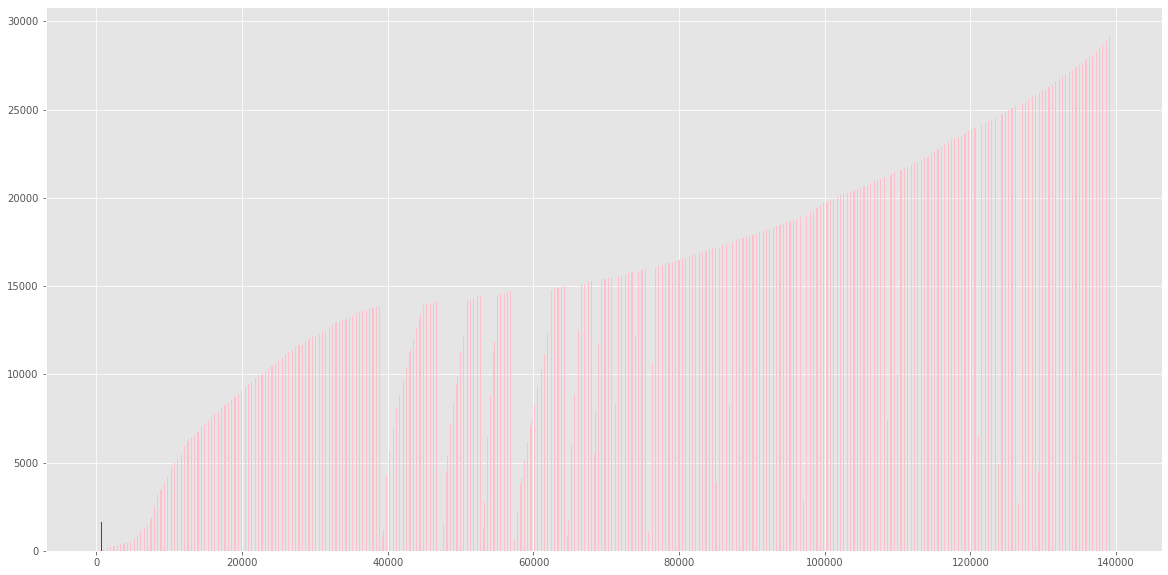

In [32]:
### 9단계 : 그래프로 데이터 시각화 
plt.style.use('ggplot') 

mon_6_payment_sum =  to_graph_df.loc['2013-06', 'payment'].sum()


# stacked = 누적치,
#df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))
#df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
to_graph_df.plot(kind='bar', width = 0.7 , color=['pink','green'] ,  figsize=(20, 10))


menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
#데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨로 표시)
plt.style.use('ggplot') 

df_4.index=df_4.index.map(int)

# stacked = 누적치,
#df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))
#df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
df_4.plot(kind='bar', width = 0.7 , color=['orange','green','skyblue','pink'] ,  figsize=(20, 10))


# 차트 제목 추가
plt.title('서울 -> 충남, 경북, 강원, 전라 인구 이동', size=30)

# 축이름 추가
plt.xlabel('기간', size=12)
plt.ylabel('이동 인구수', size = 12)
plt.legend(loc='best', fontsize=15)
plt.ylim(10000,80000)

plt.show()